<a href="https://www.kaggle.com/emmanuelobiajuru/911-emergency?scriptVersionId=89192521" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/911dataset/911.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# hospital_emergency_case
# Indicating that the header starts from the first column
hec = pd.read_csv('../input/911dataset/911.csv', sep=',', header=0)
hec.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 14:39,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
# Showing the shape of the dataset number columns and rows
# showing the info of the dataset(911.csv)
hec.shape
hec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
#count the number items in columns zip and twp
hec['zip'].value_counts().head(8)


19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
19002.0    21070
19468.0    18939
19046.0    17886
Name: zip, dtype: int64

In [6]:
#count the number items in columns twp
hec['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [7]:
# Find the count of unique values in title column
hec['title'].nunique()

148

In [8]:
hec['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [9]:
# Counting the number cases where EMS had Subject in pain
hec[hec['title']=='EMS: SUBJECT IN PAIN'].count()['title']

19646

In [10]:
# Separating the EMS prefix from the string
x=hec['title'].iloc[0]
x.split(':')[0]

'EMS'

In [11]:
# replacing the header title to reason
hec['reason']= hec['title'].apply(lambda title:title.split(':')[0])
hec.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 14:39,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [12]:
# Counting the number of item in reason column
hec['reason'].value_counts()
hec.groupby('reason').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
reason,,,,,,,,,
EMS,332692,332692,332692,304855,332692,332692,332480,332692,332692
Fire,100622,100622,100622,88867,100622,100622,100545,100622,100622
Traffic,230208,230208,230208,189601,230208,230208,230204,230208,230208


<AxesSubplot:xlabel='reason', ylabel='count'>

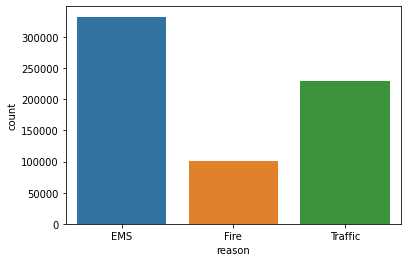

In [13]:
# Bar chart to show the case count to respective reason
sns.countplot(data=hec, x='reason')

In [14]:
#Examining the timeStamp field to determine the Datatype
hec['timeStamp'].iloc[0]

'12/10/2015 17:10'

In [15]:
type(hec['timeStamp'].iloc[0])

str

In [16]:
# Changing the Data Type from str to timestamps
hec['timeStamp']=pd.to_datetime(hec['timeStamp'])
type(hec['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
#The time in hour, Days and Year
time= hec['timeStamp'].iloc[0]
time.hour
time.dayofweek
time.year

2015

In [18]:
# Applying the conversion of year month day and time to the time stamp
hec['Hour']=hec['timeStamp'].apply(lambda time: time.hour)
hec['Month']=hec['timeStamp'].apply(lambda time: time.month)
hec['DayofWeek']=hec['timeStamp'].apply(lambda time: time.dayofweek)
hec['Year']=hec['timeStamp'].apply(lambda time: time.year)

In [19]:
hec.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,DayofWeek,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,12,3,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3,2015


In [20]:
#
hec['DayofWeek'].unique()
Dic_DayofWeek={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

<AxesSubplot:xlabel='DayofWeek', ylabel='count'>

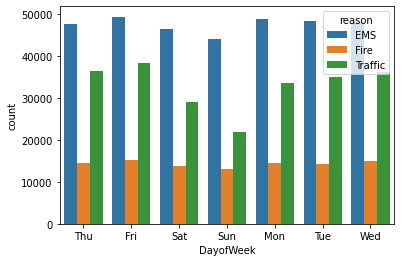

In [21]:

hec['DayofWeek']=hec['DayofWeek'].map(Dic_DayofWeek)
hec.head()
sns.countplot(data=hec, x='DayofWeek', hue='reason')
